In [43]:
####-------------------------1.Rashmi-----------------------------------------------------
####1.Missing Data Handling & Encoding


##1.Data Cleaning (Missing & Duplicate Handling)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO  # If loading from string (e.g., if data is copied as text)

# Load the dataset
df = pd.read_csv('Student Depression Dataset.csv')

# If loading from the provided text snippet (for demonstration, since full data is truncated):
# data_str = """id,Gender,Age,City,Profession,..."""

# Display basic info to understand the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Step 1: Check for Missing Values
missing_values = df.isna().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_percent)

# Handling Missing Values
# If any missing, impute numerical columns with median (robust to outliers), categorical with mode
# Assumption: Based on data types (e.g., Age, CGPA numerical; Gender, City categorical)
if missing_values.sum() > 0:
    # Numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        if missing_values[col] > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # Categorical columns
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if missing_values[col] > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print("\nMissing Values After Handling:")
    print(df.isna().sum())
else:
    print("\nNo missing values found. No imputation needed.")

# Step 2: Check for Duplicates
duplicates_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates_count)

# Handling Duplicates
if duplicates_count > 0:
    df = df.drop_duplicates()
    print("\nDuplicates Removed. New Shape:", df.shape)
else:
    print("\nNo duplicates found. No removal needed.")

# Save the cleaned dataset (for group pipeline integration)
df.to_csv('cleaned_student_depression_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_student_depression_dataset.csv'")

Dataset Shape: (27901, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration              

/tmp/ipython-input-250220728.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



Cleaned dataset saved as 'cleaned_student_depression_dataset.csv'


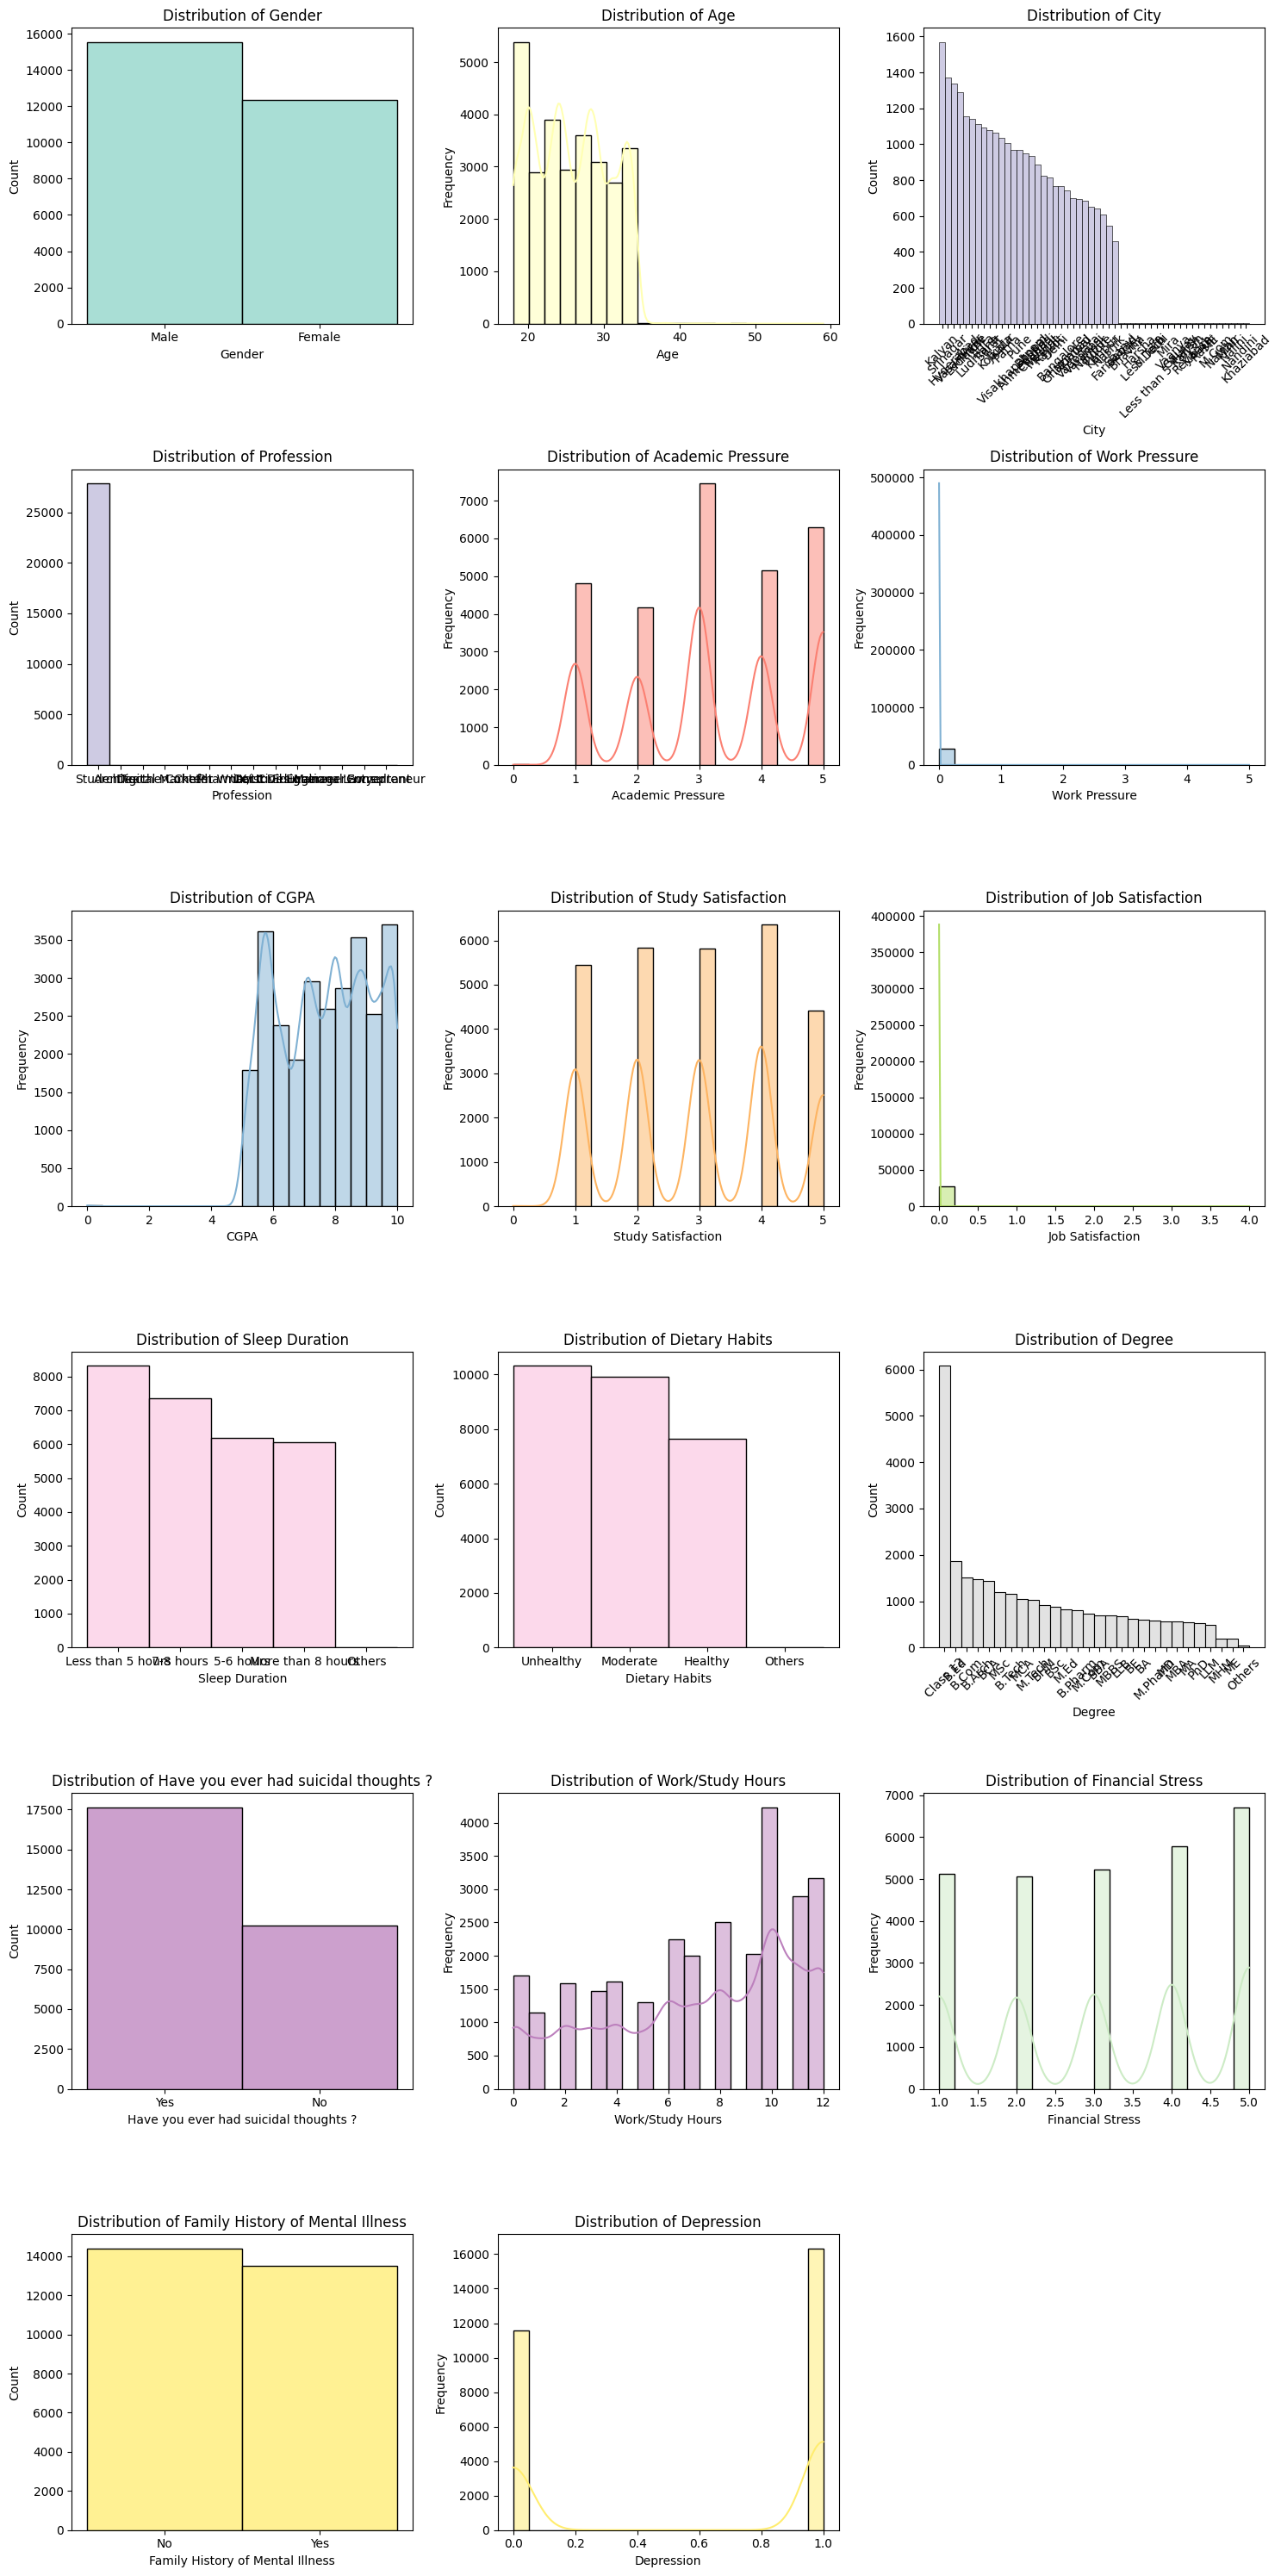

In [44]:

## EDA Visualizations for Handeling Missing Data

# Set style for better visualization
import os
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# List of all columns (excluding 'id')
all_cols = ['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure',
            'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
            'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
            'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness',
            'Depression']

# Create a figure with subplots
n_cols = len(all_cols)
n_rows = (n_cols + 2) // 3  # Adjust rows to fit 3 columns per row
plt.figure(figsize=(15, 5 * n_rows))

# Generate histograms for each column
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, 3, i)
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        sns.histplot(data=df, x=col, bins=20, kde=True, color=plt.cm.Set3(i / n_cols))
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:  # Categorical/Binary columns
        # Create a DataFrame with value counts and use the original column name
        cat_data = df[col].value_counts().reset_index()
        cat_data.columns = [col, 'count'] # Rename columns
        sns.histplot(data=cat_data, x=col, weights='count',
                     color=plt.cm.Set3(i / n_cols), discrete=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45 if col == 'City' or col == 'Degree' else 0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_1'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(output_dir, 'all_columns_histogram.png'))
plt.show()

In [26]:
%pip install category_encoders

Original Dataset (First 5 Rows of Categorical Columns):
   gender suicidal_thoughts family_history profession     sleep_duration  \
0    Male               Yes             No    Student          5-6 hours   
1  Female                No            Yes    Student          5-6 hours   
2    Male                No            Yes    Student  Less than 5 hours   
3  Female               Yes            Yes    Student          7-8 hours   
4  Female               Yes             No    Student          5-6 hours   

  dietary_habits   degree           city  
0        Healthy  B.Pharm  Visakhapatnam  
1       Moderate      BSc      Bangalore  
2        Healthy       BA       Srinagar  
3       Moderate      BCA       Varanasi  
4       Moderate   M.Tech         Jaipur  

gender Encoding Mapping: {'Female': np.int64(0), 'Male': np.int64(1)}

suicidal_thoughts Encoding Mapping: {'No': np.int64(0), 'Yes': np.int64(1)}

family_history Encoding Mapping: {'No': np.int64(0), 'Yes': np.int64(1)}

--- On

/tmp/ipython-input-2897667199.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-2897667199.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-2897667199.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
/tmp/ipython-input-2897667199.py:135: FutureWarni

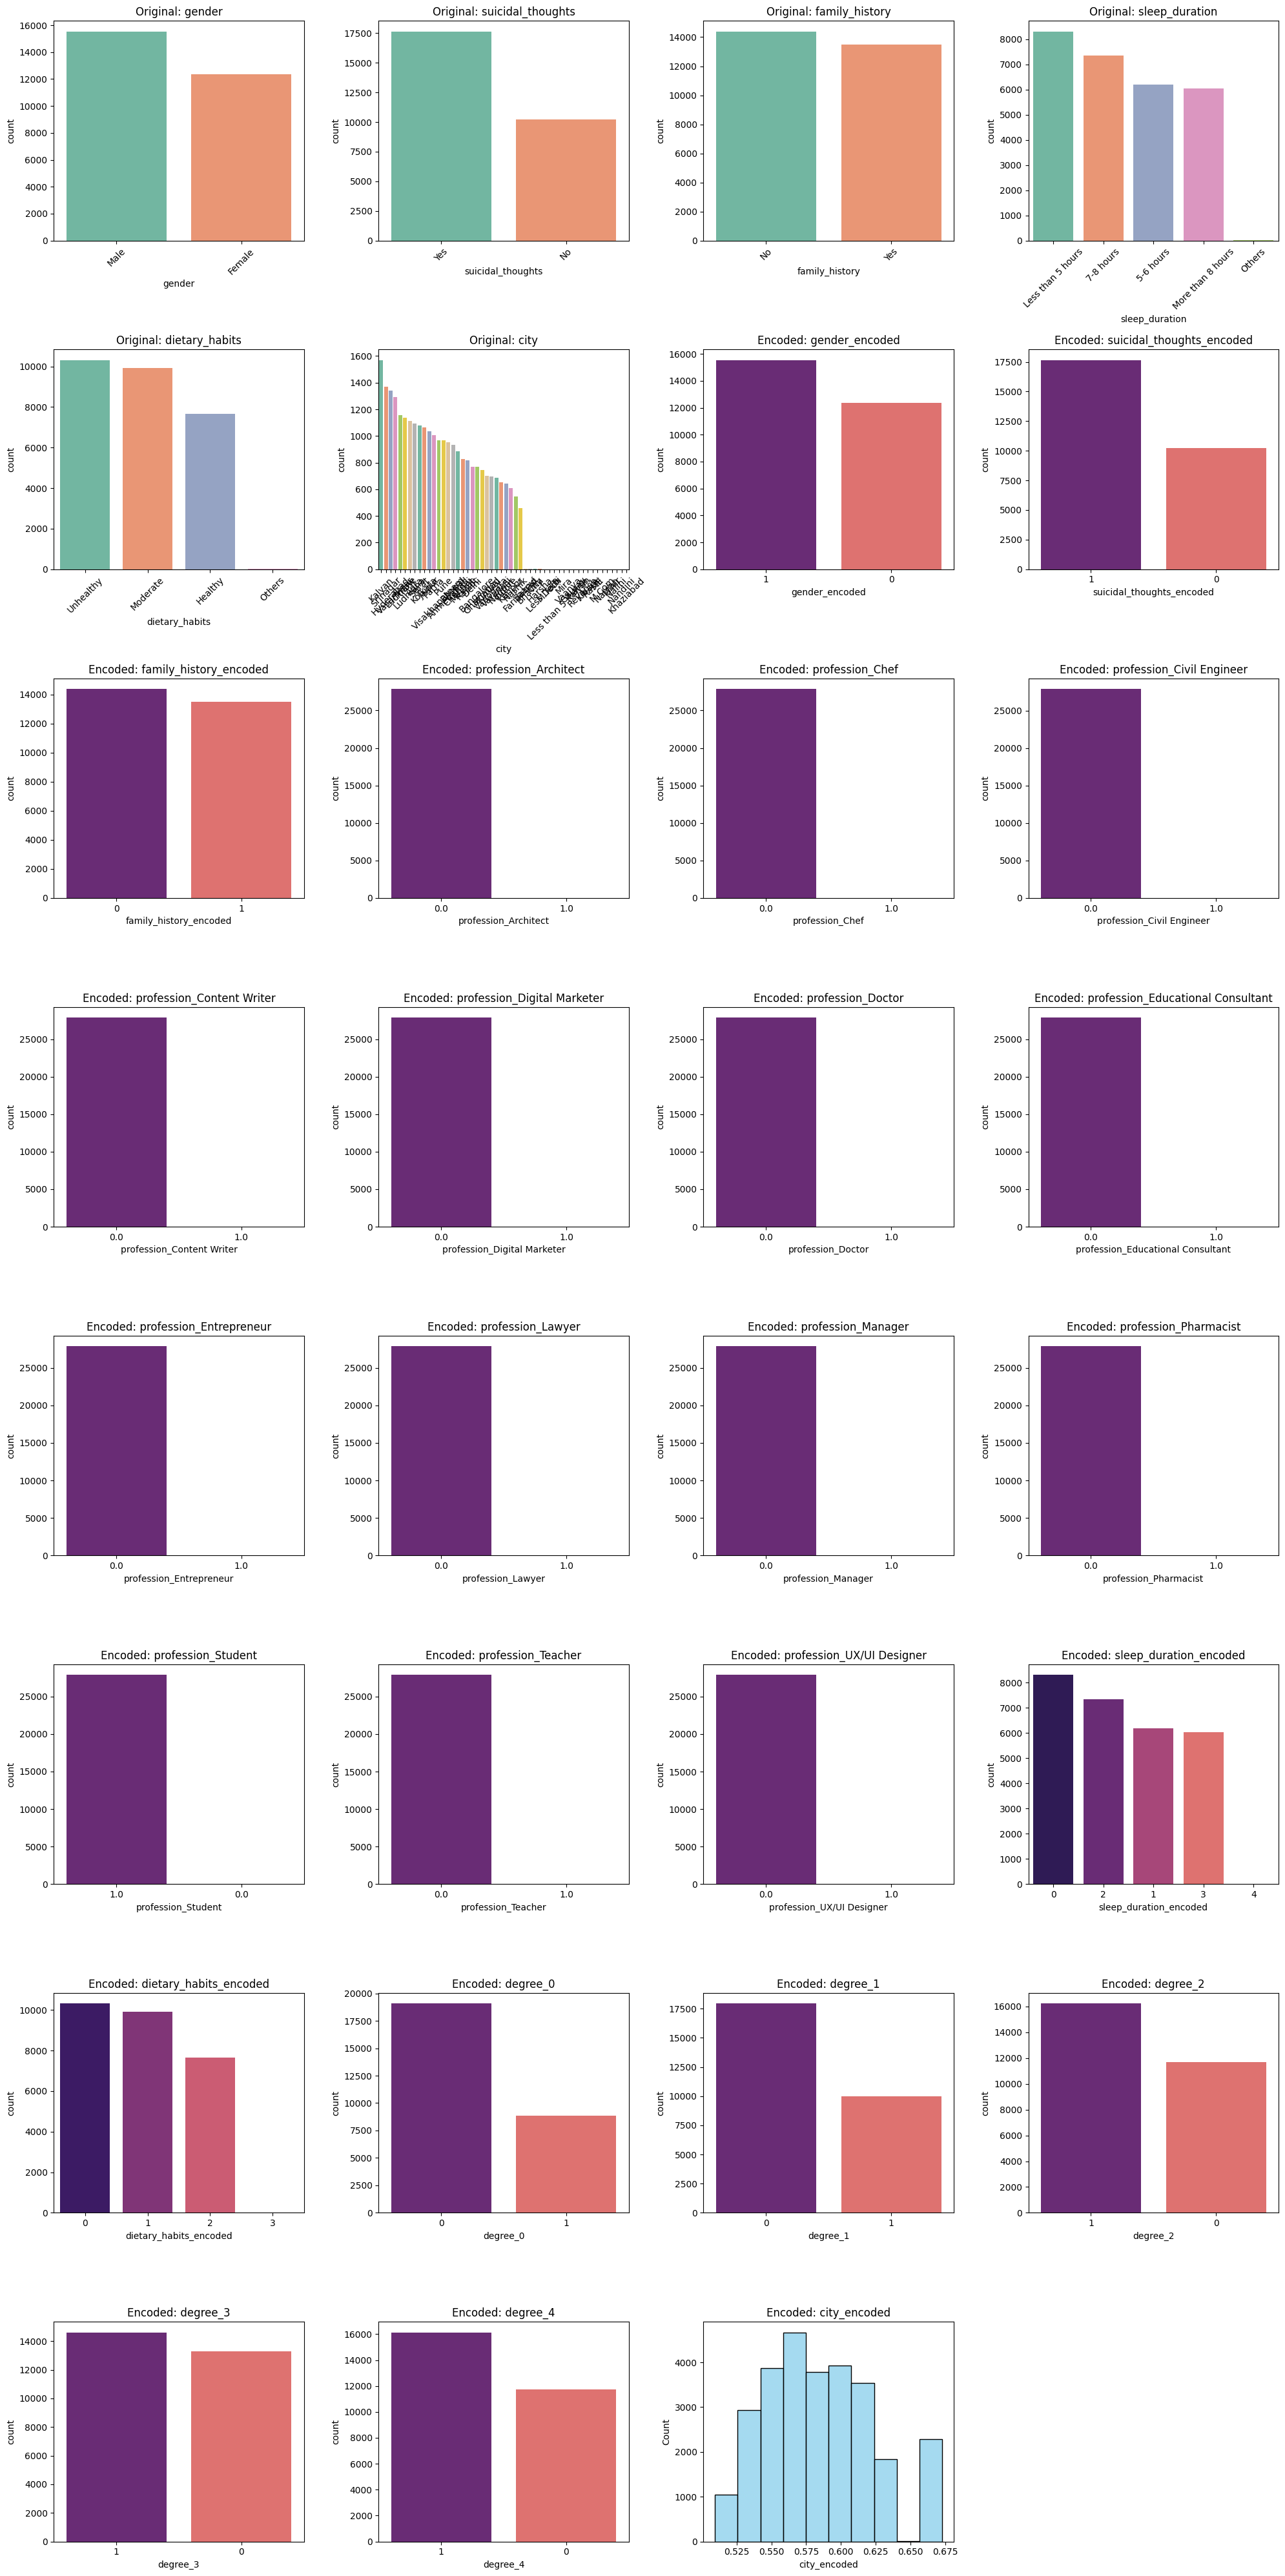


Fully encoded dataset (containing only encoded and non-categorical columns) saved as 'fully_encoded_student_depression_dataset.csv'


In [27]:
##2.Encoding Categorical Variables

# Import libraries with try-except for dependency checks
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    from category_encoders import BinaryEncoder, TargetEncoder
except ImportError as e:
    print(f"Error: Missing library - {e}. Install with: pip install pandas matplotlib seaborn scikit-learn category_encoders")
    exit()

# Load the dataset with error handling
try:
    df = pd.read_csv('cleaned_student_depression_dataset.csv')
    if df.empty:
        raise ValueError("Dataset is empty. Check file path or content.")
except FileNotFoundError:
    print("Error: 'cleaned_student_depression_dataset.csv' not found. Ensure it exists in the working directory.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Rename categorical columns for clarity and consistency
column_renames = {
    'Gender': 'gender',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Family History of Mental Illness': 'family_history',
    'Profession': 'profession',
    'Sleep Duration': 'sleep_duration',
    'Dietary Habits': 'dietary_habits',
    'Degree': 'degree',
    'City': 'city'
}
df.rename(columns=column_renames, inplace=True)

# Define categorical columns and verify their presence
cat_cols = ['gender', 'suicidal_thoughts', 'family_history', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'city']
missing_cols = [col for col in cat_cols if col not in df.columns]
if missing_cols:
    print(f"Error: The following columns are missing from the dataset: {missing_cols}")
    exit()

# Display original data sample
print("Original Dataset (First 5 Rows of Categorical Columns):")
print(df[cat_cols].head())

# --- Encoding Section ---

# 1. Label Encoding: Binary columns (gender, suicidal_thoughts, family_history)
le = LabelEncoder()
label_cols = ['gender', 'suicidal_thoughts', 'family_history']
for col in label_cols:
    if col in df.columns:
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        print(f"\n{col} Encoding Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    else:
        print(f"Warning: {col} not found, skipping label encoding.")

# 2. One-Hot Encoding: profession
print("\n--- One-Hot Encoding ---")
print("Column: profession")
if 'profession' in df.columns:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe_encoded = ohe.fit_transform(df[['profession']])
    ohe_cols = ohe.get_feature_names_out(['profession'])
    ohe_df_encoded = pd.DataFrame(ohe_encoded, columns=ohe_cols, index=df.index)
    df = pd.concat([df, ohe_df_encoded], axis=1)
    df.drop('profession', axis=1, inplace=True)
    print("\nOne-Hot Encoded Columns (First 5 Rows):")
    print(df[ohe_cols].head())
else:
    print("Warning: 'profession' not found, skipping One-Hot Encoding.")

# 3. Ordinal Encoding: sleep_duration, dietary_habits
ordinal_mapping_sleep = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3, 'Others': 4}
ordinal_mapping_diet = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2, 'Others': 3}
if 'sleep_duration' in df.columns:
    df['sleep_duration_encoded'] = df['sleep_duration'].map(ordinal_mapping_sleep).astype('Int64')
if 'dietary_habits' in df.columns:
    df['dietary_habits_encoded'] = df['dietary_habits'].map(ordinal_mapping_diet).astype('Int64')
print("\nOrdinal Encoded Columns Added (sleep_duration_encoded, dietary_habits_encoded):")
print(df[['sleep_duration_encoded', 'dietary_habits_encoded']].head())

# 4. Binary Encoding: degree
try:
    if 'degree' in df.columns:
        be = BinaryEncoder(cols=['degree'])
        df_binary = be.fit_transform(df[['degree']])
        df = pd.concat([df, df_binary], axis=1)
        df.drop('degree', axis=1, inplace=True)
        binary_cols = [col for col in df_binary.columns if col.startswith('degree_')]
        print("\nBinary Encoded Degree Columns Added:", binary_cols)
        print(df[binary_cols].head())
    else:
        print("Warning: 'degree' not found, skipping Binary Encoding.")
except Exception as e:
    print(f"Error in Binary Encoding: {e}. Ensure category_encoders is installed.")
    exit()

# 5. Target Encoding: city (assuming 'Depression' is the target column)
try:
    if 'city' in df.columns and 'Depression' in df.columns:
        te = TargetEncoder(cols=['city'])
        df['city_encoded'] = te.fit_transform(df[['city']], df['Depression'])
        print("\nTarget Encoded City Column Added (city_encoded):")
        print(df[['city_encoded']].head())
    else:
        print("Warning: 'city' or 'Depression' not found, skipping Target Encoding.")
except Exception as e:
    print(f"Error in Target Encoding: {e}. Check target variable 'Depression' or install category_encoders.")
    exit()

# Display encoded dataset snippet
encoded_cols = [col for col in df.columns if '_encoded' in col or col.startswith('profession_') or col.startswith('degree_')]
print("\nEncoded Dataset (First 5 Rows of Encoded Columns):")
print(df[encoded_cols].head())

# --- EDA Visualizations for All Categorical Columns ---

# Create subplots for original and encoded categorical columns
original_cols = [col for col in cat_cols if col in df.columns]
n_cols = len(original_cols)
encoded_cols = [col for col in df.columns if '_encoded' in col or col.startswith('profession_') or col.startswith('degree_')]
n_encoded = len(encoded_cols)
total_plots = n_cols + n_encoded
n_rows = (total_plots + 3) // 4  # Calculate rows needed (4 plots per row)
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
axes = axes.ravel()

# Plot original categorical columns
for i, col in enumerate(original_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
    axes[i].set_title(f'Original: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Plot encoded categorical columns
for i, col in enumerate(encoded_cols):
    if 'city_encoded' in col:
        sns.histplot(df[col], bins=10, ax=axes[i + n_cols], color='skyblue')
    else:
        sns.countplot(x=col, data=df, ax=axes[i + n_cols], palette='magma', order=df[col].value_counts().index)
    axes[i + n_cols].set_title(f'Encoded: {col}')
    axes[i + n_cols].tick_params(axis='x', rotation=0)

# Remove unused subplots
for j in range(total_plots, len(axes)):
    axes[j].remove()

plt.tight_layout()



# Save the visualizations
plt.savefig('results/eda_visualizations/member_1/categorical_encoding_visualizations.png')
plt.show()

# Select only encoded columns and non-categorical columns (e.g., 'Depression') for saving
non_categorical_cols = [col for col in df.columns if col not in cat_cols and col not in encoded_cols]  # e.g., 'Depression'
final_cols = encoded_cols + non_categorical_cols
df_encoded_only = df[final_cols]

# Save the fully encoded dataset with only encoded columns and non-categorical columns
df_encoded_only.to_csv('fully_encoded_student_depression_dataset.csv', index=False)
print("\nFully encoded dataset (containing only encoded and non-categorical columns) saved as 'fully_encoded_student_depression_dataset.csv'")


Columns after loading CSV: Index(['gender_encoded', 'suicidal_thoughts_encoded', 'family_history_encoded',
       'profession_Architect', 'profession_Chef', 'profession_Civil Engineer',
       'profession_Content Writer', 'profession_Digital Marketer',
       'profession_Doctor', 'profession_Educational Consultant',
       'profession_Entrepreneur', 'profession_Lawyer', 'profession_Manager',
       'profession_Pharmacist', 'profession_Student', 'profession_Teacher',
       'profession_UX/UI Designer', 'sleep_duration_encoded',
       'dietary_habits_encoded', 'degree_0', 'degree_1', 'degree_2',
       'degree_3', 'degree_4', 'city_encoded', 'id', 'Age',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress',
       'Depression'],
      dtype='object')
IQR applied to Age: Removed 12 rows so far.
IQR applied to CGPA: Removed 9 rows so far.
Clipping applied to Academic Pressure: Capped to [0, 5].
Clippi

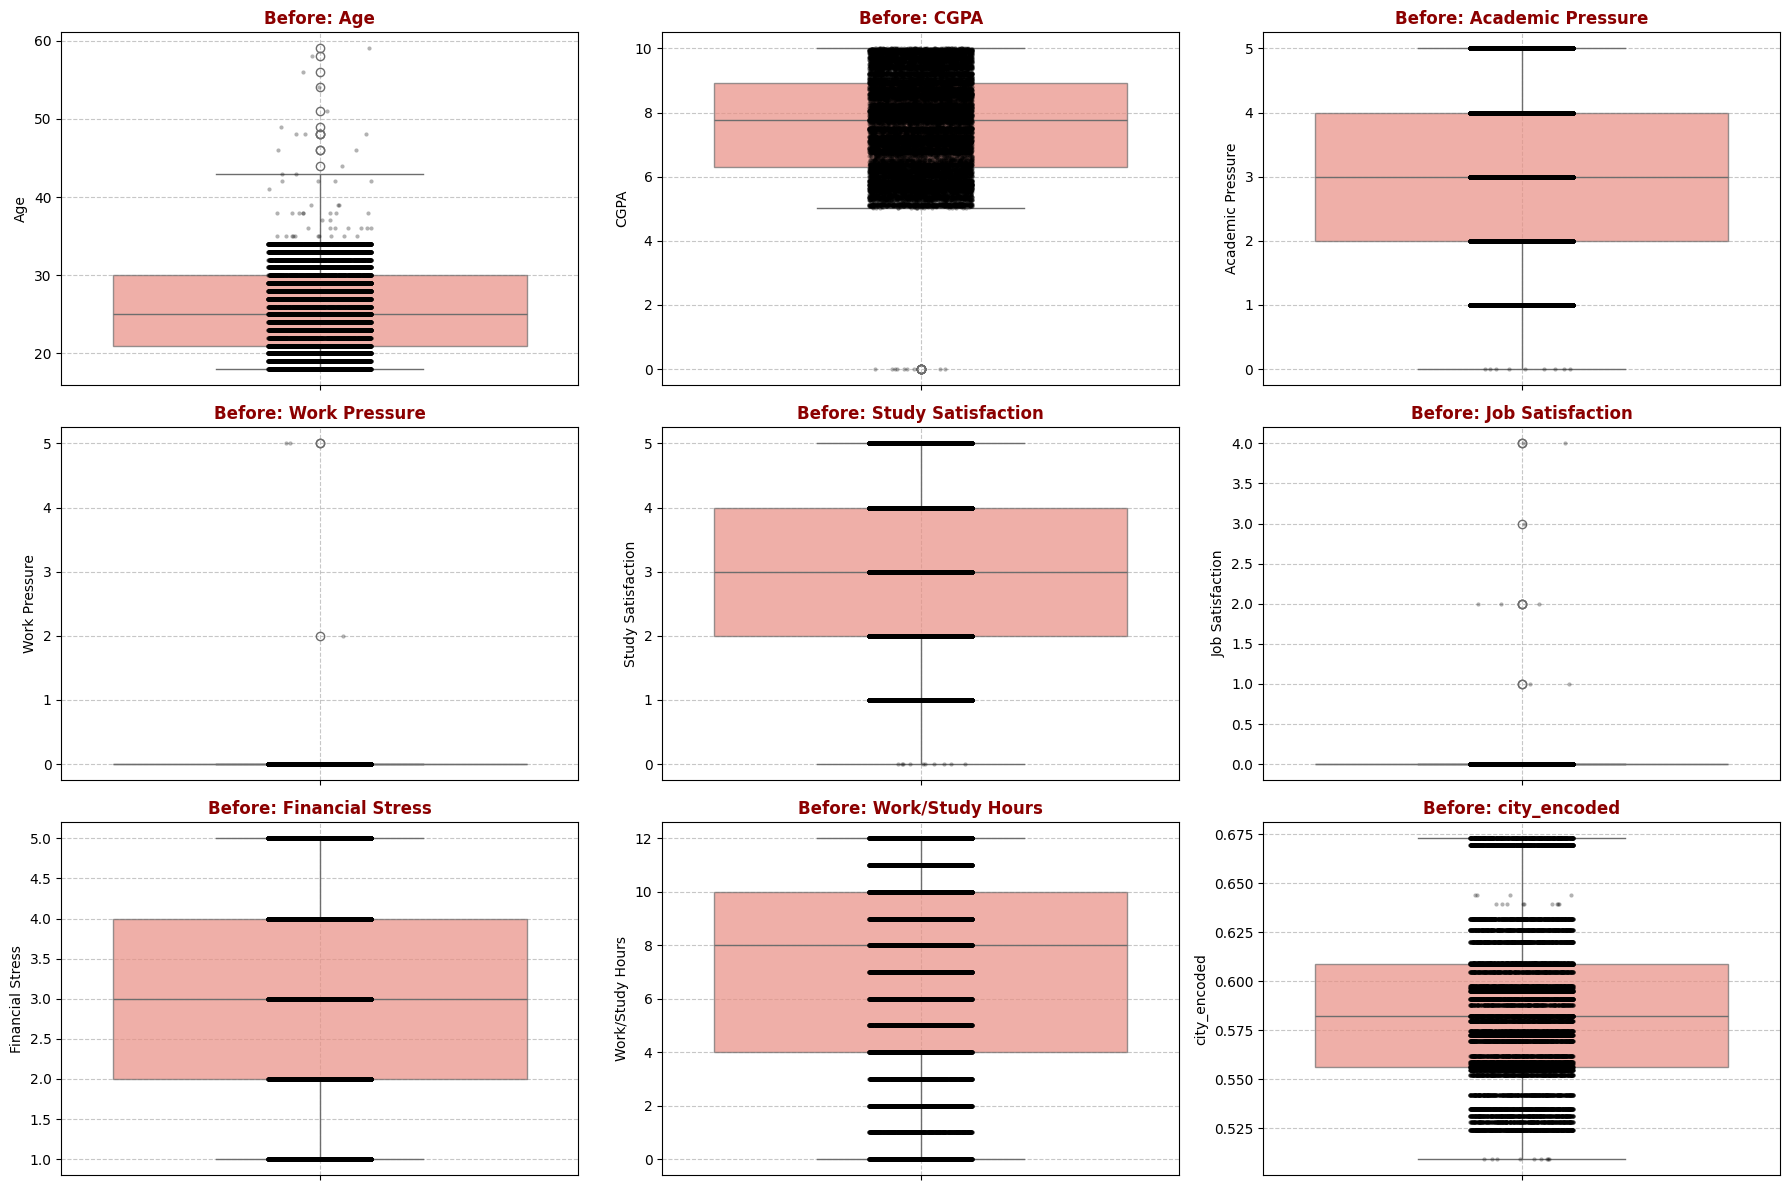

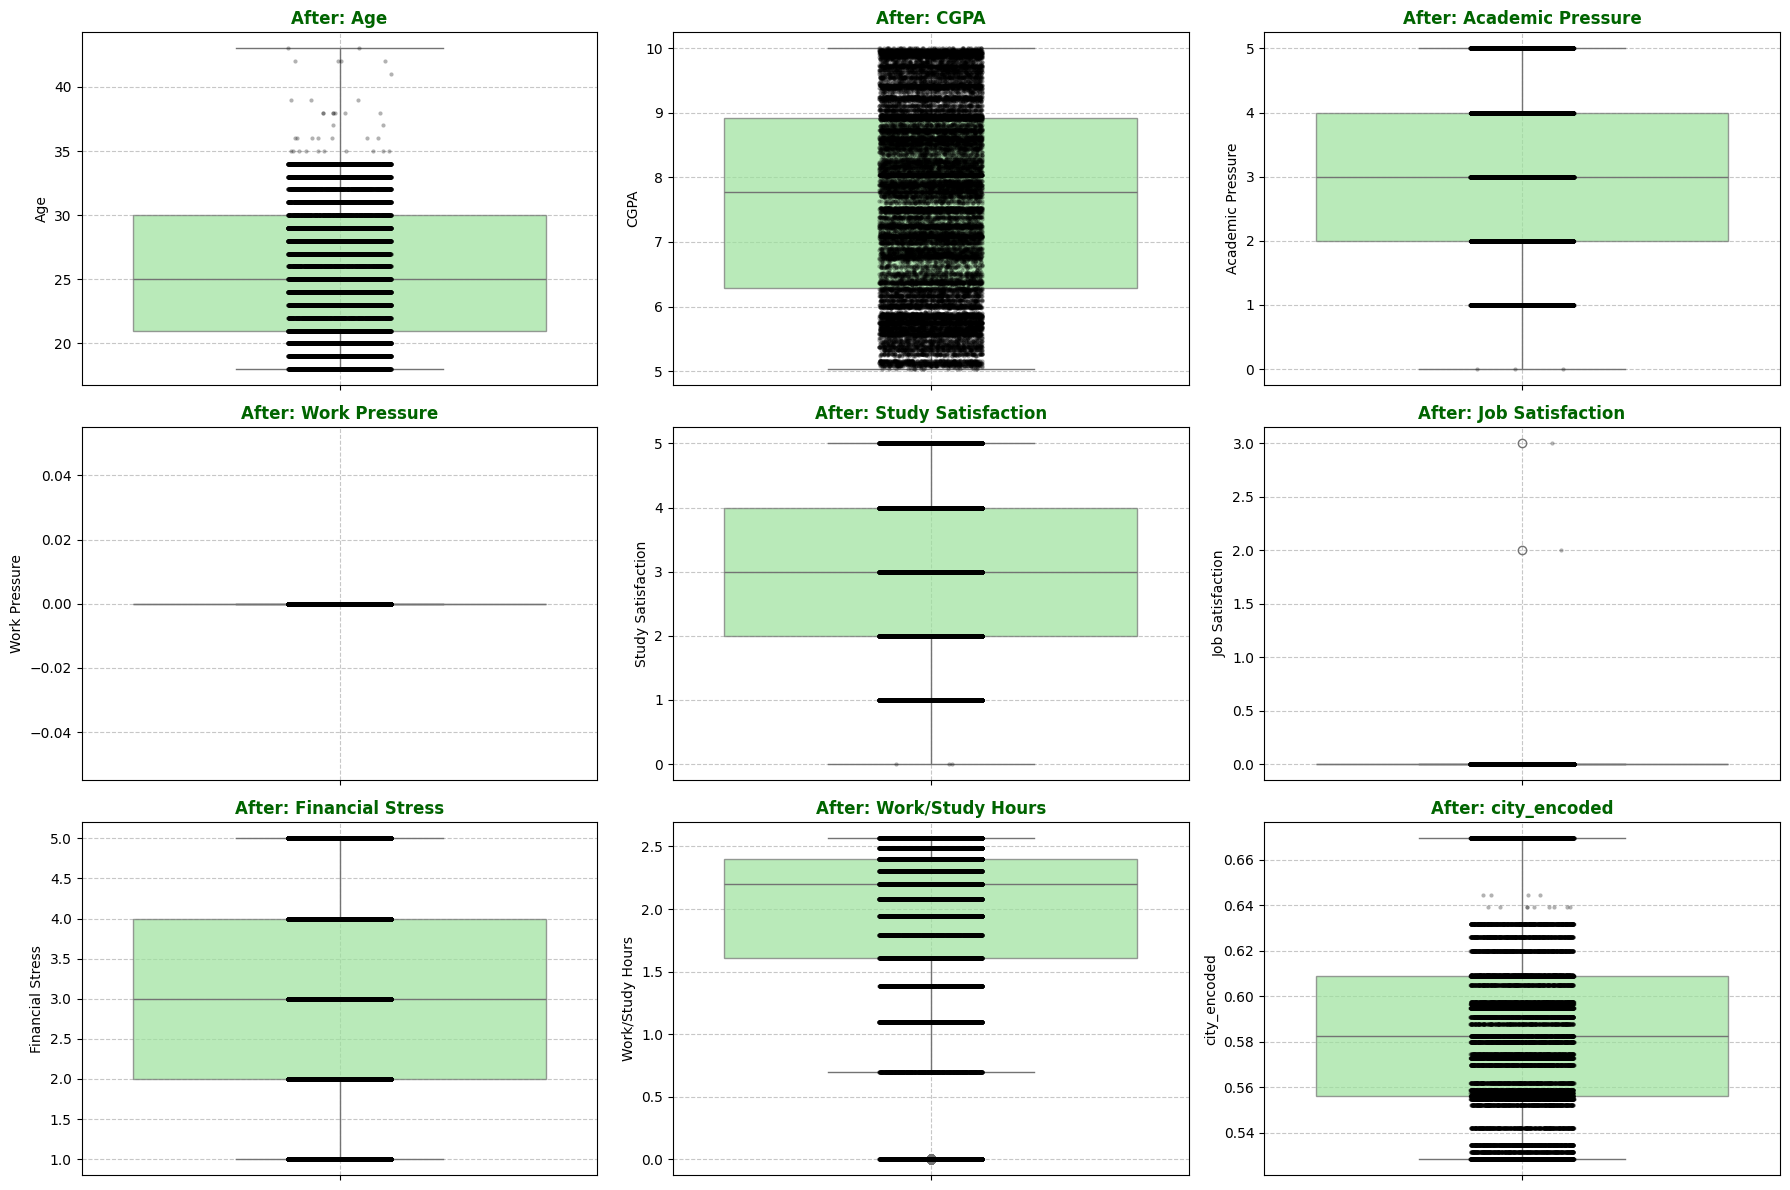


Cleaned dataset saved as 'outlier_handled_student_depression_dataset.csv'


In [29]:
####-------------------------2.Binara-----------------------------------------------------
####2.Outlier Detection & Removal

##3.Outlier Detection & Removal

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Load the cleaned dataset
try:
    df = pd.read_csv('fully_encoded_student_depression_dataset.csv')
    print("\nColumns after loading CSV:", df.columns) # Debugging line
except FileNotFoundError:
    print("Error: 'fully_encoded_student_depression_dataset.csv' not found. Please run the data cleaning step first.")
    exit()

# Copy original dataframe for comparison
df_original = df.copy()
df_cleaned = df.copy()

# Step 1: Define method-to-column mapping (as requested)
method_to_columns = {
    'iqr': ['Age', 'CGPA'],  # Removes outliers using IQR
    'clip': ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress'],  # Capped at 0-5
    'log': ['Work/Study Hours'],  # Log transformation to handle skewness
    'winsor': ['city_encoded']  # Winsorization after encoding (for categorical)
}

# Step 2: Define functions for each method
def apply_iqr_removal(df, columns):
    """Apply IQR method: Remove rows outside Q1 - 1.5*IQR to Q3 + 1.5*IQR."""
    initial_rows = len(df)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy() # Added .copy() to avoid SettingWithCopyWarning
        print(f"IQR applied to {col}: Removed {initial_rows - len(df)} rows so far.")
        initial_rows = len(df) # Update initial_rows after each removal
    return df

def apply_clipping(df, columns, lower_bound=0, upper_bound=5):
    """Apply clipping: Cap values to [lower_bound, upper_bound]."""
    for col in columns:
        df.loc[:, col] = df[col].clip(lower_bound, upper_bound) # Use .loc to avoid SettingWithCopyWarning
        print(f"Clipping applied to {col}: Capped to [{lower_bound}, {upper_bound}].")
    return df

def apply_log_transformation(df, columns):
    """Apply log transformation: log(1 + x) to reduce skewness."""
    for col in columns:
        df.loc[:, col] = np.log1p(df[col]) # Use .loc to avoid SettingWithCopyWarning
        print(f"Log transformation applied to {col}.")
    return df

def apply_winsorization(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    """Apply winsorization: Cap to percentiles (encode City first)."""
    for col in columns:
        # Winsorization is applied to the already encoded 'city_encoded' column
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]): # Add check for column existence and numeric dtype
            lower_bound = df[col].quantile(lower_percentile)
            upper_bound = df[col].quantile(upper_percentile)
            df.loc[:, col] = df[col].clip(lower_bound, upper_bound) # Use .loc to avoid SettingWithCopyWarning
            print(f"Winsorization applied to {col}: Capped at {lower_percentile*100}% and {upper_percentile*100}% percentiles.")
        else:
            print(f"Warning: Column '{col}' not found or is not numeric for winsorization.")
    return df

# Step 3: Apply methods based on mapping
for method, columns in method_to_columns.items():
    if method == 'iqr':
        df_cleaned = apply_iqr_removal(df_cleaned, columns)
    elif method == 'clip':
        df_cleaned = apply_clipping(df_cleaned, columns)
    elif method == 'log':
        df_cleaned = apply_log_transformation(df_cleaned, columns)
    elif method == 'winsor':
        print("\nColumns before winsorization:", df_cleaned.columns) # Debugging line
        df_cleaned = apply_winsorization(df_cleaned, columns)

# Step 4: Display summary
rows_before = len(df_original)
rows_after = len(df_cleaned)
print(f"\nSummary:")
print(f"Rows before outlier handling: {rows_before}")
print(f"Rows after outlier handling: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")

# Step 5: Enhanced EDA Visualizations (Before & After)
# Flatten column list for plotting
all_columns = sum(method_to_columns.values(), [])

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_2'
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(18, 12))
# Before handling
for i, col in enumerate(all_columns, 1):
    plt.subplot(3, 3, i)
    # Check if the original column exists in df_original before plotting
    if col in df_original.columns and df_original[col].dtype in ['float64', 'int64']:
        sns.boxplot(data=df_original, y=col, color='salmon', boxprops=dict(alpha=0.7))
        sns.stripplot(data=df_original, y=col, color='black', size=3, alpha=0.3)
        plt.title(f'Before: {col}', fontsize=12, fontweight='bold', color='darkred')
        plt.ylabel(col)
    elif col in df_original.columns and df_original[col].dtype == 'object': # Handle original categorical columns
        sns.countplot(data=df_original, x=col, palette='viridis', order=df_original[col].value_counts().index[:5])  # Top 5
        plt.title(f'Before: {col} (Top 5)', fontsize=12, fontweight='bold', color='darkred')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    elif col in df_original.columns: # Handle encoded numerical columns including 'city_encoded'
        sns.boxplot(data=df_original, y=col, color='salmon', boxprops=dict(alpha=0.7))
        sns.stripplot(data=df_original, y=col, color='black', size=3, alpha=0.3)
        plt.title(f'Before: {col}', fontsize=12, fontweight='bold', color='darkred')
        plt.ylabel(col)

    plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'outliers_before_enhanced.png'))
plt.show()

plt.figure(figsize=(18, 12))
# After handling
for i, col in enumerate(all_columns, 1):
    plt.subplot(3, 3, i)
    # Check if the cleaned column exists in df_cleaned before plotting
    if col in df_cleaned.columns and df_cleaned[col].dtype in ['float64', 'int64']:
        sns.boxplot(data=df_cleaned, y=col, color='lightgreen', boxprops=dict(alpha=0.7))
        sns.stripplot(data=df_cleaned, y=col, color='black', size=3, alpha=0.3)
        plt.title(f'After: {col}', fontsize=12, fontweight='bold', color='darkgreen')
        plt.ylabel(col)
    elif col in df_cleaned.columns and df_cleaned[col].dtype == 'object': # Handle original categorical columns
        sns.countplot(data=df_cleaned, x=col, palette='viridis', order=df_cleaned[col].value_counts().index[:5])  # Top 5
        plt.title(f'After: {col} (Top 5)', fontsize=12, fontweight='bold', color='darkgreen')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    elif col in df_cleaned.columns: # Handle encoded numerical columns including 'city_encoded'
        sns.boxplot(data=df_cleaned, y=col, color='lightgreen', boxprops=dict(alpha=0.7))
        sns.stripplot(data=df_cleaned, y=col, color='black', size=3, alpha=0.3)
        plt.title(f'After: {col}', fontsize=12, fontweight='bold', color='darkgreen')
        plt.ylabel(col)

    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'outliers_after_enhanced.png'))
plt.show()

# Step 6: Save cleaned dataset
df_cleaned.to_csv('outlier_handled_student_depression_dataset.csv', index=False)
print("\nCleaned dataset saved as 'outlier_handled_student_depression_dataset.csv'")

Standard Scaling applied to Age, CGPA, and Work/Study Hours (columns suffixed with '_standard').
Min-Max Scaling applied to city_encoded (City), Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, and Financial Stress (columns suffixed with '_minmax').

Summary Statistics for 'CGPA' (Standard Scaling Example):
Before Scaling:
count    27880.000000
mean         7.658626
std          1.464599
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

After Standard Scaling:
count    2.788000e+04
mean     1.070402e-17
std      1.000018e+00
min     -1.794808e+00
25%     -9.344884e-01
50%      7.604541e-02
75%      8.612575e-01
max      1.598674e+00
Name: CGPA_standard, dtype: float64

Summary Statistics for 'Academic Pressure' (Min-Max Scaling Example):
Before Scaling:
count    27880.000000
mean         3.142181
std          1.380801
min          0.000000
25%          2.000000
50%          3.

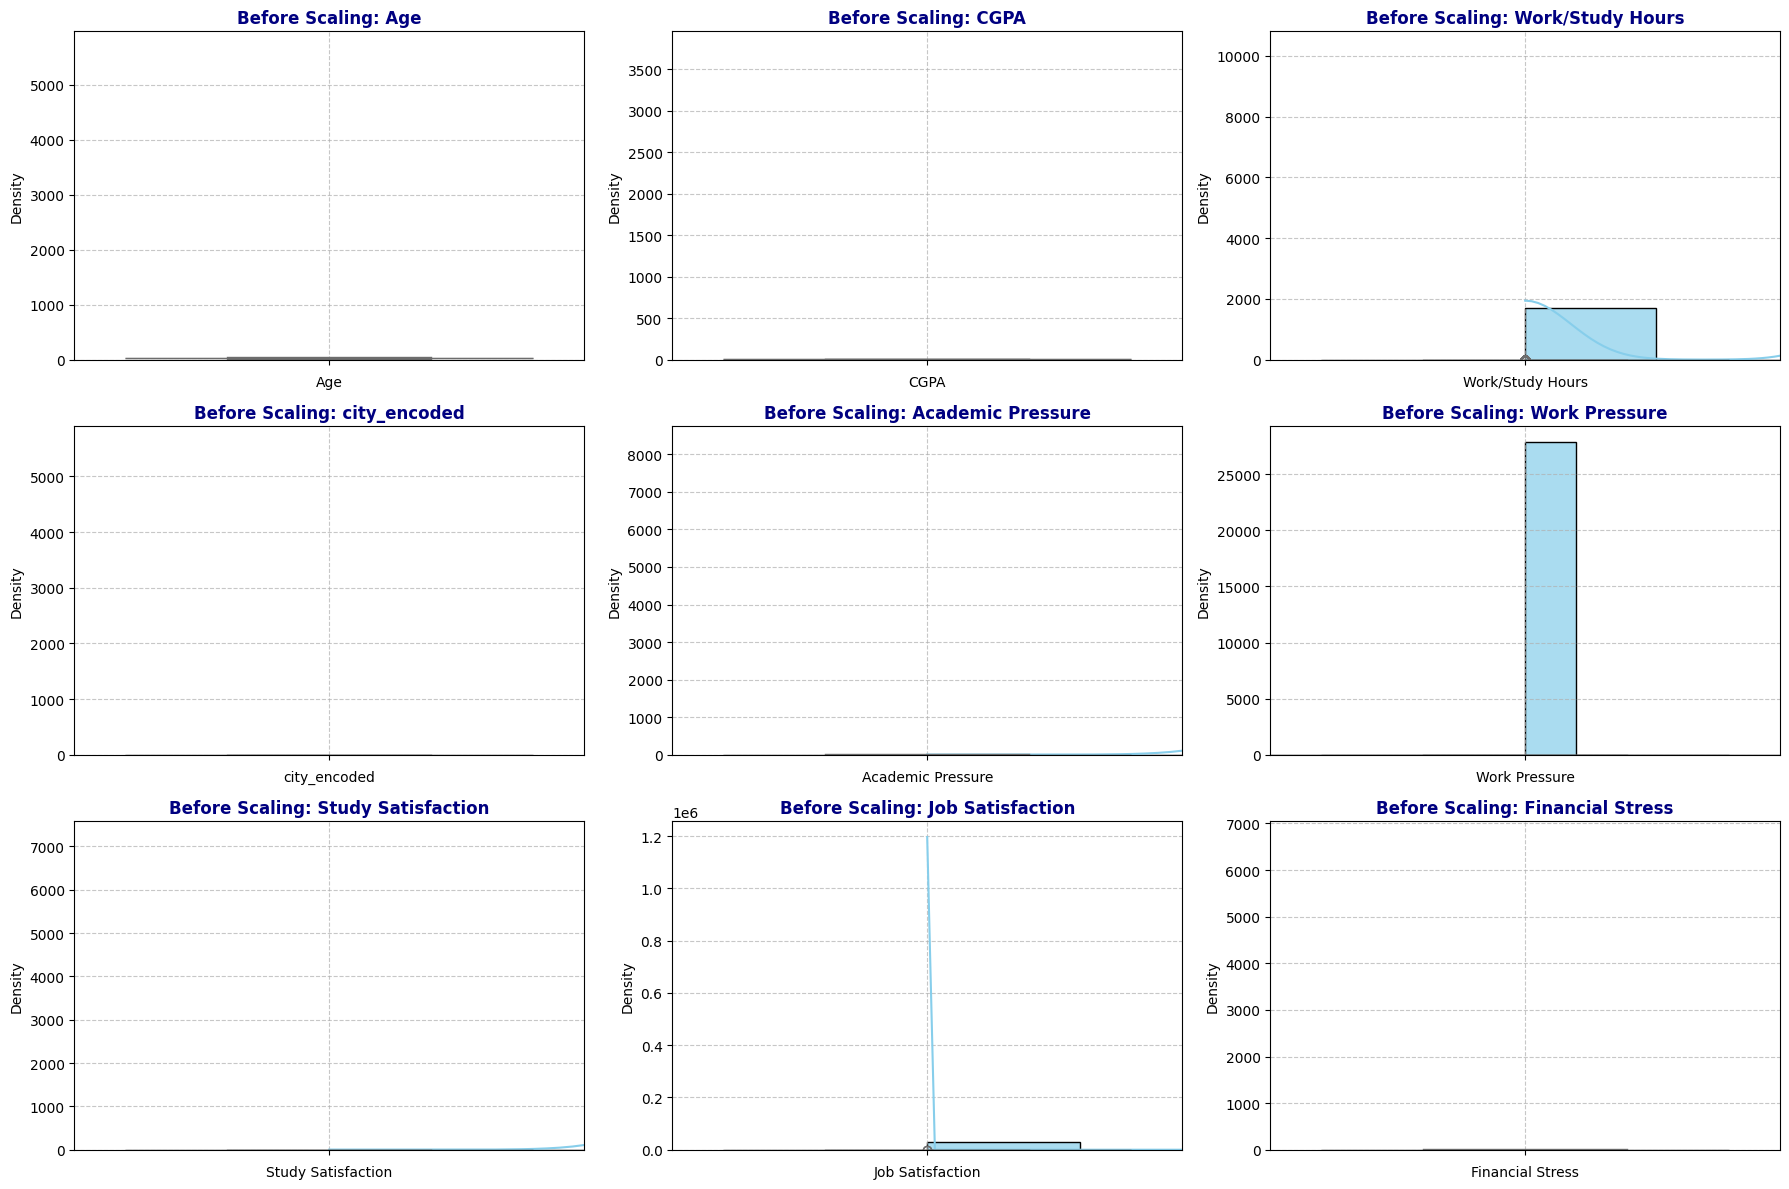

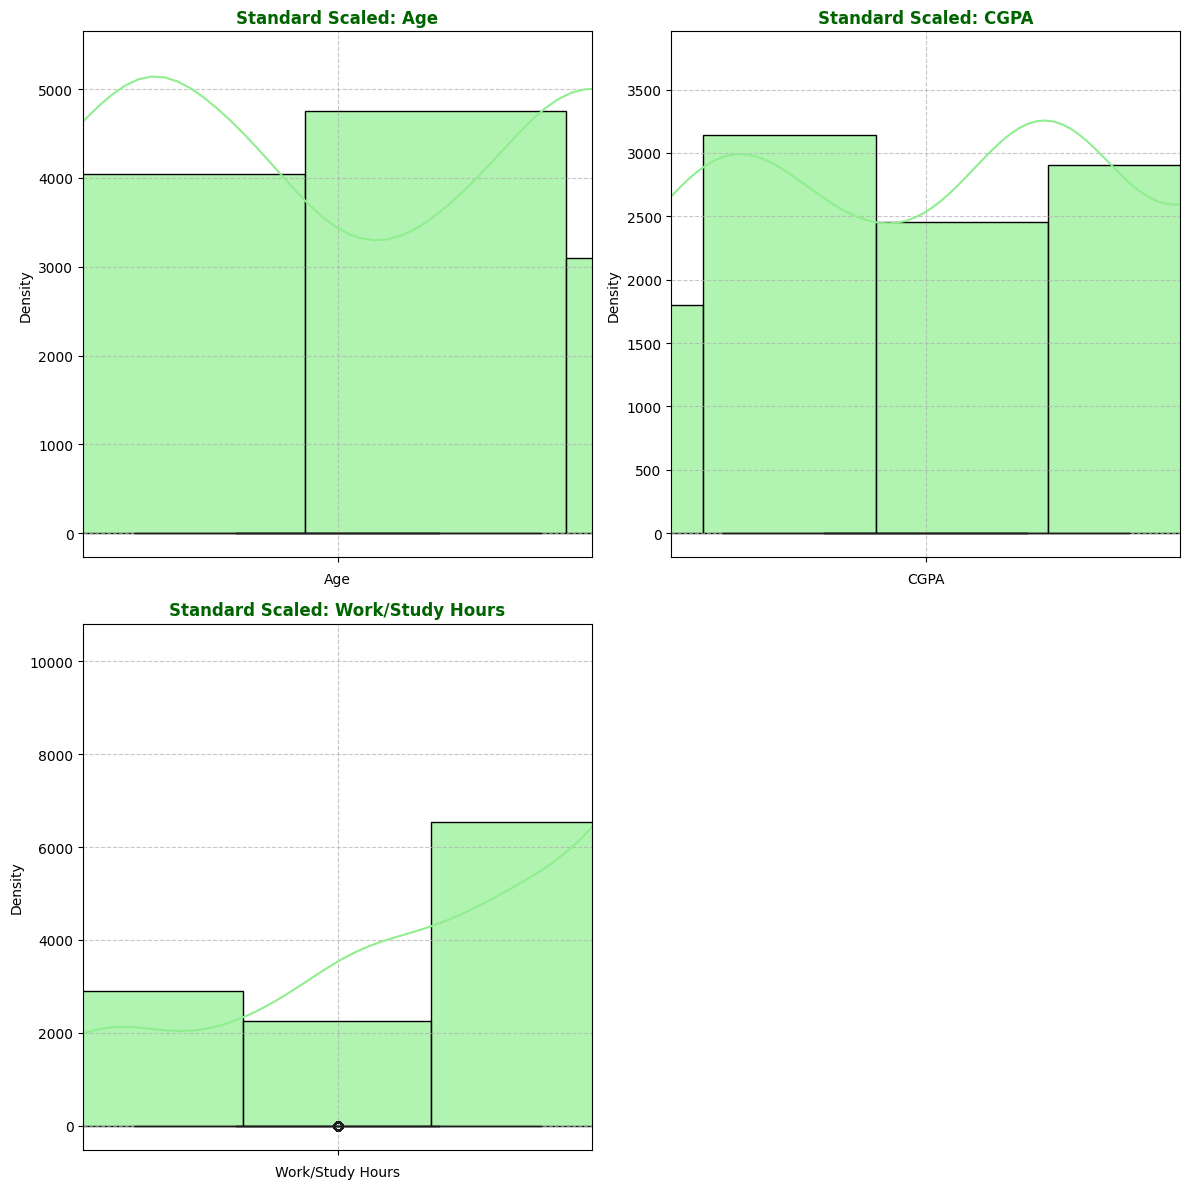

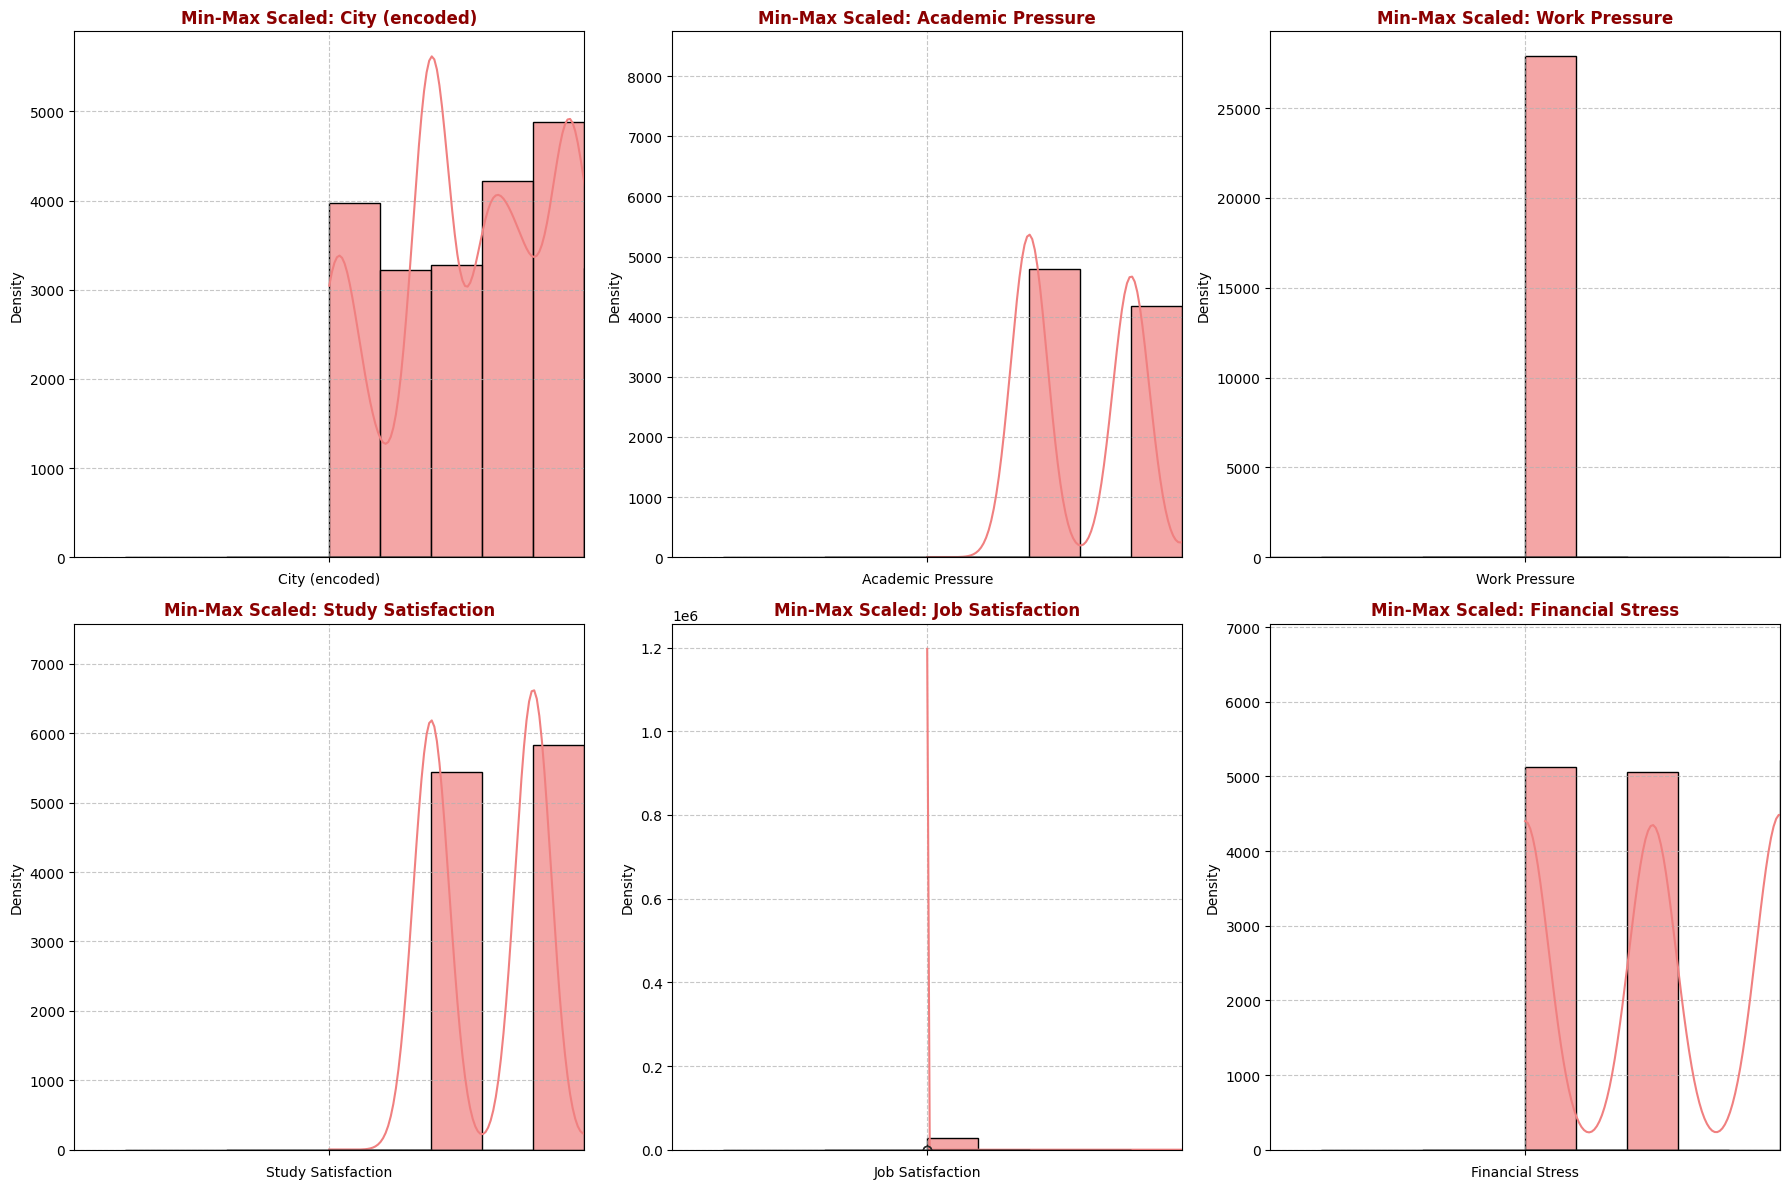


Combined scaled dataset saved as:
- 'scaled_student_depression_dataset.csv'


In [33]:
####-------------------------3.Himaya -----------------------------------------------------
#### 3.Feature Scaling

## 4.Feature Scaling / Normalization

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import os

# Load the outlier-handled dataset
try:
    df = pd.read_csv('outlier_handled_student_depression_dataset.csv')
except FileNotFoundError:
    print("Error: 'outlier_handled_student_depression_dataset.csv' not found. Please run the outlier handling step first.")
    exit()

# Copy original dataframe for comparison
df_original = df.copy()

# Step 1: Define method-to-column mapping
method_to_columns = {
    'standard': ['Age', 'CGPA', 'Work/Study Hours'],  # Standard Scaling
    'minmax': ['city_encoded', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction',
               'Job Satisfaction', 'Financial Stress']  # Min-Max Scaling (use city_encoded for City)
}

# Step 2: Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Step 3: Apply scaling methods and combine into one DataFrame
df_scaled = df_original.copy()

# Apply Standard Scaling and add suffixed columns to df_scaled
standard_cols = method_to_columns['standard']
df_scaled[[f'{col}_standard' for col in standard_cols]] = standard_scaler.fit_transform(df_original[standard_cols])
print("Standard Scaling applied to Age, CGPA, and Work/Study Hours (columns suffixed with '_standard').")

# Apply Min-Max Scaling and add suffixed columns to df_scaled
minmax_cols = method_to_columns['minmax']
df_scaled[[f'{col}_minmax' for col in minmax_cols]] = minmax_scaler.fit_transform(df_original[minmax_cols])
print("Min-Max Scaling applied to city_encoded (City), Academic Pressure, Work Pressure, Study Satisfaction, Job Satisfaction, and Financial Stress (columns suffixed with '_minmax').")

# Step 4: Display summary statistics (before and after for one column from each method)
print("\nSummary Statistics for 'CGPA' (Standard Scaling Example):")
print("Before Scaling:")
print(df_original['CGPA'].describe())
print("\nAfter Standard Scaling:")
print(df_scaled['CGPA_standard'].describe())

print("\nSummary Statistics for 'Academic Pressure' (Min-Max Scaling Example):")
print("Before Scaling:")
print(df_original['Academic Pressure'].describe())
print("\nAfter Min-Max Scaling:")
print(df_scaled['Academic Pressure_minmax'].describe())

# Step 5: Enhanced EDA Visualizations
# Columns to visualize before scaling (original names)
cols_before_scaling = method_to_columns['standard'] + method_to_columns['minmax']

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_3'
os.makedirs(output_dir, exist_ok=True)

# Before Scaling
plt.figure(figsize=(18, 12))
for i, col in enumerate(cols_before_scaling, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_original, x=col, color='skyblue', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_original, y=col, color='salmon', boxprops=dict(alpha=0.5))
    plt.title(f'Before Scaling: {col}', fontsize=12, fontweight='bold', color='navy')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_before_enhanced.png'))
plt.show()

# After Standard Scaling
plt.figure(figsize=(12, 12))
for i, col in enumerate(standard_cols, 1):
    scaled_col = f'{col}_standard'
    plt.subplot(2, 2, i)
    sns.histplot(data=df_scaled, x=scaled_col, color='lightgreen', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_scaled, y=scaled_col, color='darkgreen', boxprops=dict(alpha=0.5))
    plt.title(f'Standard Scaled: {col}', fontsize=12, fontweight='bold', color='darkgreen')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_standard_enhanced.png'))
plt.show()

# After Min-Max Scaling
plt.figure(figsize=(18, 12))
for i, col in enumerate(minmax_cols, 1):
    scaled_col = f'{col}_minmax'
    plt.subplot(2, 3, i)
    sns.histplot(data=df_scaled, x=scaled_col, color='lightcoral', kde=True, bins=10, alpha=0.7)
    sns.boxplot(data=df_scaled, y=scaled_col, color='darkred', boxprops=dict(alpha=0.5))
    display_col_name = col if col != 'city_encoded' else 'City (encoded)'
    plt.title(f'Min-Max Scaled: {display_col_name}', fontsize=12, fontweight='bold', color='darkred')
    plt.xlabel(display_col_name)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45 if col == 'city_encoded' else 0)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'scaling_minmax_enhanced.png'))
plt.show()

# Step 6: Save the combined scaled dataset
df_scaled.to_csv('scaled_student_depression_dataset.csv', index=False)
print("\nCombined scaled dataset saved as:")
print("- 'scaled_student_depression_dataset.csv'")

/tmp/ipython-input-1301884394.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study_Efficiency'].fillna(df['Study_Efficiency'].median(), inplace=True)



First 5 Rows of New Derived Features:
   Total_Stress  Stress_Hours_Interact  Study_Efficiency  Age_Group  \
0           6.0               6.931472          6.470487          2   
1           4.0               2.772589          4.255950          0   
2           4.0               6.907755          3.053090          2   
3           8.0               4.828314          3.473262          1   
4           5.0               2.772589         11.729111          1   

   CGPA_Group  Financial_Stress_Group  
0           2                       0  
1           0                       0  
2           1                       0  
3           0                       2  
4           2                       0  


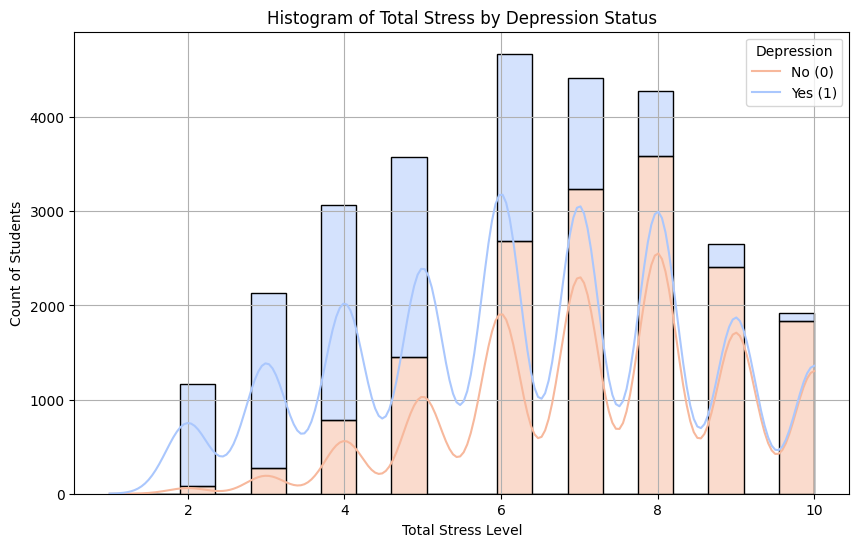


Dataset with new features saved as 'features_engineered_student_depression.csv'


In [35]:
####-------------------------4. Jenode-----------------------------------------------------
####4. Create New Derived Features

####5. Create New Derived Features


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  # Used here for truncated data; remove in full notebook
import os # Import os module

# Load the outlier-handled dataset
try:
    df = pd.read_csv('scaled_student_depression_dataset.csv')
except FileNotFoundError:
    print("Error: 'scaled_student_depression_dataset.csv' not found. Please run the outlier handling step first.")
    exit()

# Step 2: Create New Derived Features

# Aggregations: Total_Stress = Academic Pressure + Work Pressure + Financial Stress (captures overall pressure)
df['Total_Stress'] = df['Academic Pressure'] + df['Work Pressure'] + df['Financial Stress']

# Interactions: Stress_Hours_Interact = Academic Pressure * Work/Study Hours (high pressure + long hours → depression risk)
df['Stress_Hours_Interact'] = df['Academic Pressure'] * df['Work/Study Hours']

# Ratios: Study_Efficiency = CGPA / Work/Study Hours (efficiency metric; handle 0 hours with median fill)
df['Study_Efficiency'] = df['CGPA'] / np.where(df['Work/Study Hours'] > 0, df['Work/Study Hours'], np.nan)
df['Study_Efficiency'].fillna(df['Study_Efficiency'].median(), inplace=True)

# Binnings:
# Age_Group = bin Age (e.g., <25=young=0, 25-30=mid=1, >30=older=2)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 24.999, 30, df['Age'].max() + 1], labels=[0, 1, 2], right=True)
df['Age_Group'] = df['Age_Group'].astype(int)

# CGPA_Group = bin CGPA (<6=low=0, 6-8=medium=1, >8=high=2)
df['CGPA_Group'] = pd.cut(df['CGPA'], bins=[0, 5.999, 8, df['CGPA'].max() + 1], labels=[0, 1, 2], right=True)
df['CGPA_Group'] = df['CGPA_Group'].astype(int)

# Financial_Stress_Group = bin Financial Stress (1-2=low=0, 3=medium=1, 4-5=high=2)
df['Financial_Stress_Group'] = pd.cut(df['Financial Stress'], bins=[0.999, 2, 3, df['Financial Stress'].max() + 1], labels=[0, 1, 2], right=True)
df['Financial_Stress_Group'] = df['Financial_Stress_Group'].astype(int)


# Handle any NaNs (e.g., from ratios or binning)
df.fillna(0, inplace=True)  # Safe fallback for any remaining NaNs

# Show output: First 5 rows of new derived features
print("\nFirst 5 Rows of New Derived Features:")
print(df[['Total_Stress', 'Stress_Hours_Interact', 'Study_Efficiency', 'Age_Group', 'CGPA_Group', 'Financial_Stress_Group']].head())

# EDA Visualization: Histogram of Total_Stress by Depression (visually appealing with KDE and colors)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Stress', hue='Depression', multiple='stack', bins=20, kde=True, palette='coolwarm')
plt.title('Histogram of Total Stress by Depression Status')
plt.xlabel('Total Stress Level')
plt.ylabel('Count of Students')
plt.legend(title='Depression', labels=['No (0)', 'Yes (1)'])
plt.grid(True)  # Adds grid for better readability

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_4'
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'total_stress_histogram.png'))  # Save for repo/results/eda_visualizations
plt.show()

# Save the updated dataset for further steps
df.to_csv('features_engineered_student_depression.csv', index=False)
print("\nDataset with new features saved as 'features_engineered_student_depression.csv'")


Number of PCA components retaining 95% variance: 17

First 5 Rows of PCA Components:
   PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0         0.042868        -0.267517         0.066664         0.200043   
1         0.025290        -0.077462         0.037293        -0.199508   
2         0.128062         0.745470         0.089583         0.061089   
3         0.026273        -0.024588        -0.213639        -0.115453   
4         0.129046         0.798345        -0.161349         0.145144   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  PCA_Component_8  \
0        -0.017976         0.031889         0.020243        -0.003967   
1        -0.022114         0.022644         0.015936        -0.007632   
2        -0.082833         0.030417         0.025386        -0.007156   
3         0.124499         0.004945        -0.003416         0.000082   
4         0.063780         0.012717         0.006034         0.000558   

   PCA_Component_9  PCA_Component_10

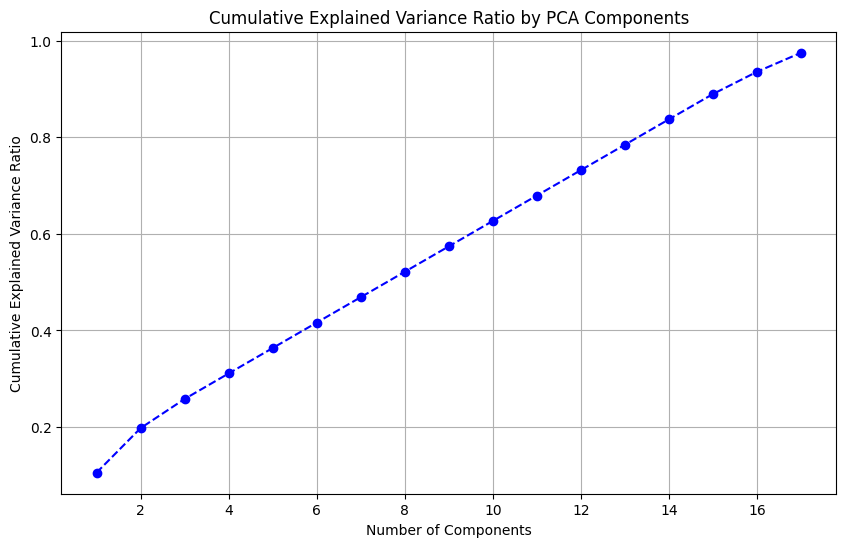

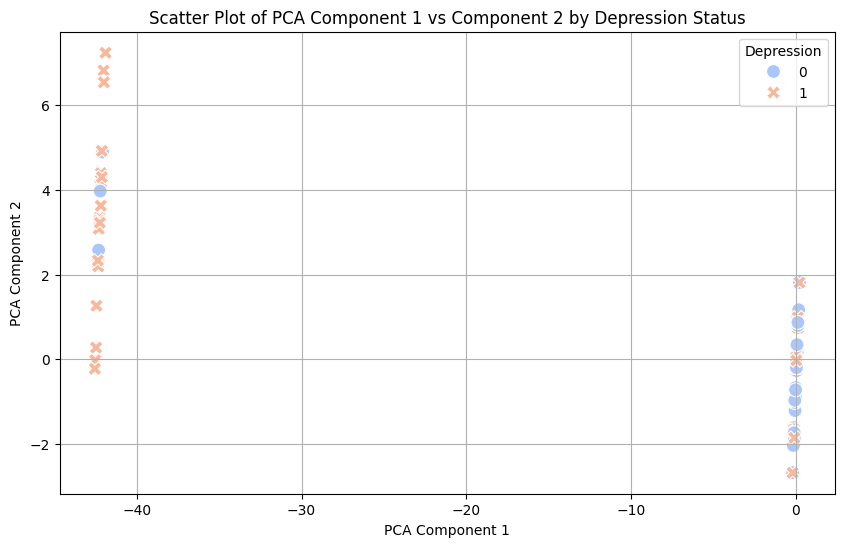

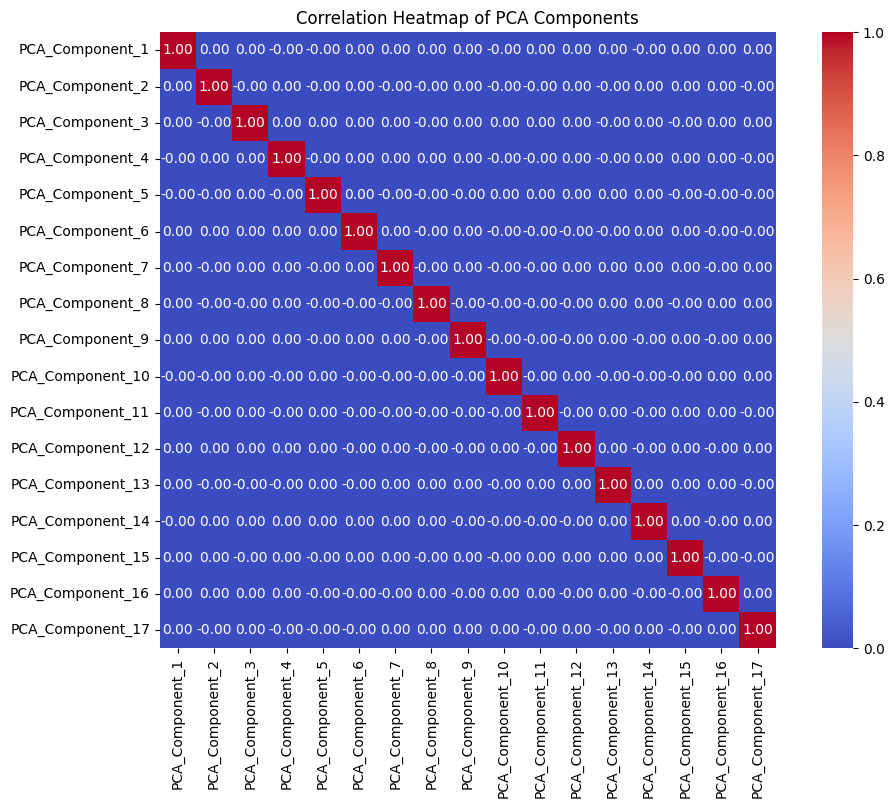


Dataset with PCA components saved as 'pca_reduced_student_depression.csv'


In [38]:
####-------------------------5.Vihanga-----------------------------------------------------
####5.Dimensionality Reduction

##6.Dimensionality Reduction


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os # Import os module


# Load the dataset from Step 6
try:
    df = pd.read_csv('features_engineered_student_depression.csv')
except FileNotFoundError:
    print("Error: 'features_engineered_student_depression.csv' not found. Please run the polynomial features step first.")
    exit()

# Step 7: Dimensionality Reduction using PCA
# Identify one-hot encoded and categorical columns for PCA
categorical_columns = [col for col in df.columns if col.startswith('profession_') or col.startswith('degree_')]

# Verify that the required columns exist
if not categorical_columns:
    print("Error: No categorical columns (profession_* or degree_*) found for PCA.")
    exit()

# Extract the categorical columns for PCA
X_categorical = df[categorical_columns]

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_categorical)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Get the number of components selected
n_components = X_pca.shape[1]
print(f"\nNumber of PCA components retaining 95% variance: {n_components}")

# Create a DataFrame with the PCA components
pca_columns = [f'PCA_Component_{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)

# Combine the original dataset with the PCA components, dropping the original categorical columns
df_reduced = pd.concat([df.drop(columns=categorical_columns), pca_df], axis=1)

# Handle any NaNs that might arise
df_reduced = df_reduced.fillna(0)

# Display the first 5 rows of the PCA components
print("\nFirst 5 Rows of PCA Components:")
print(pca_df.head())

# Summary statistics of PCA components
print("\nSummary of PCA Components:")
print(pca_df.describe())

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_5'
os.makedirs(output_dir, exist_ok=True)

# EDA Visualization 1: Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'pca_explained_variance.png'))
plt.show()

# EDA Visualization 2: Scatter Plot of First Two PCA Components by Depression Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Component_1', y='PCA_Component_2', hue='Depression', style='Depression', data=df_reduced, palette='coolwarm', s=100)
plt.title('Scatter Plot of PCA Component 1 vs Component 2 by Depression Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'pca_scatter_depression.png'))
plt.show()

# EDA Visualization 3: Correlation Heatmap of PCA Components
plt.figure(figsize=(12, 8))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of PCA Components')
plt.savefig(os.path.join(output_dir, 'pca_correlation_heatmap.png'))
plt.show()

# Save the updated dataset with PCA components
df_reduced.to_csv('pca_reduced_student_depression.csv', index=False)
print("\nDataset with PCA components saved as 'pca_reduced_student_depression.csv'")

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 8 19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/tmp/ipython-input-712836053.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores.head(25), palette='viridis')



Selected 25 Features:
['suicidal_thoughts_encoded', 'family_history_encoded', 'sleep_duration_encoded', 'dietary_habits_encoded', 'city_encoded', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Age_standard', 'CGPA_standard', 'Work/Study Hours_standard', 'city_encoded_minmax', 'Academic Pressure_minmax', 'Study Satisfaction_minmax', 'Financial Stress_minmax', 'Total_Stress', 'Stress_Hours_Interact', 'Study_Efficiency', 'Age_Group', 'CGPA_Group', 'Financial_Stress_Group', 'PCA_Component_2']

First 5 Rows of Selected Features:
   suicidal_thoughts_encoded  family_history_encoded  sleep_duration_encoded  \
0                        1.0                     0.0                     1.0   
1                        0.0                     1.0                     1.0   
2                        0.0                     1.0                     0.0   
3                        1.0                     1.0                     2.0   
4                

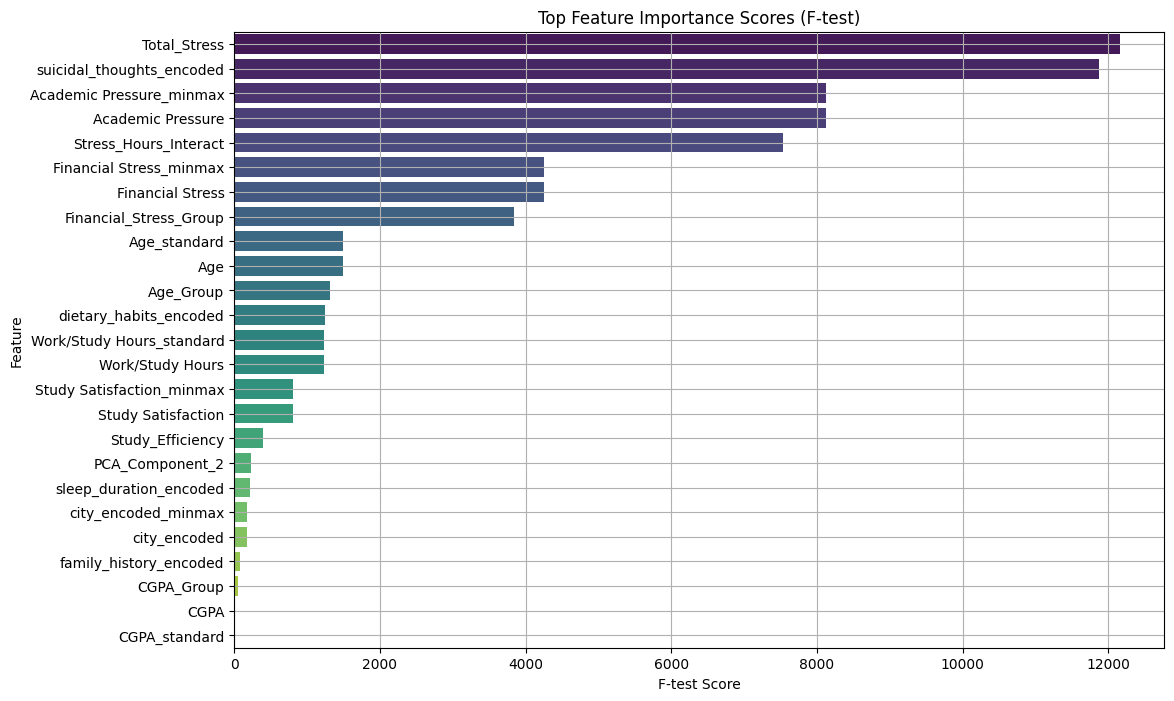

/tmp/ipython-input-712836053.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y=top_feature, data=df_final, palette='coolwarm')


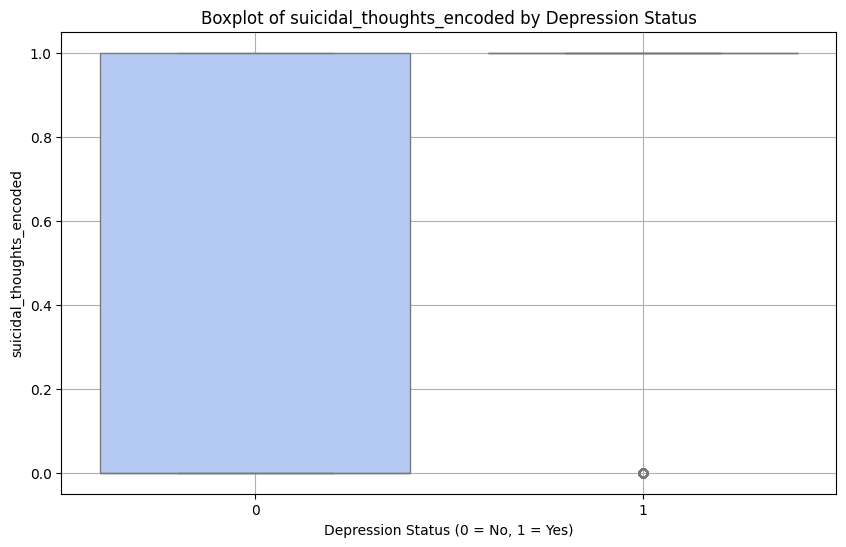

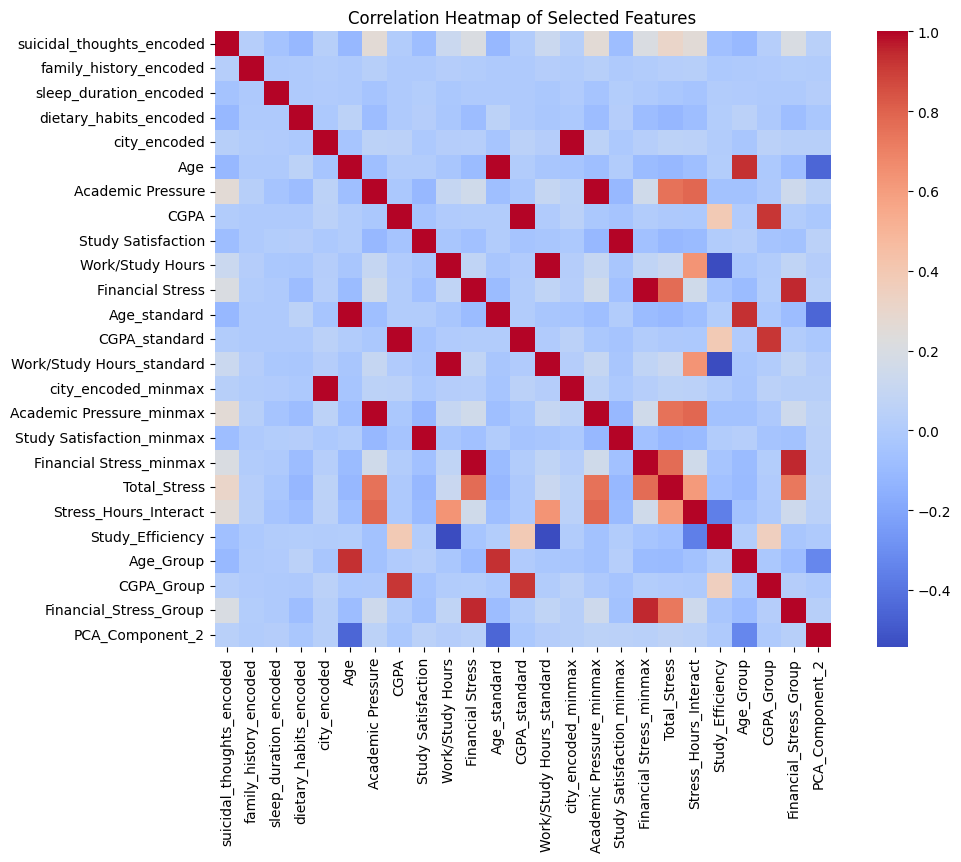


Dataset with selected features saved as 'selected_features_student_depression.csv'


In [41]:
####-------------------------6. Thanush-----------------------------------------------------
#### 6.Feature Selection

## 7.Feature Selection

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import os

# Load the dataset from Step 7
try:
    df = pd.read_csv('pca_reduced_student_depression.csv')
except FileNotFoundError:
    print("Error: 'pca_reduced_student_depression.csv' not found. Please run the dimensionality reduction step first.")
    exit()

# Step 8: Feature Selection using Univariate F-test
# Identify features (exclude 'id' and 'Depression')
feature_columns = [col for col in df.columns if col not in ['id', 'Depression']]

# Verify that there are features to select
if not feature_columns:
    print("Error: No features available for selection.")
    exit()

# Extract features and target
X = df[feature_columns]
y = df['Depression']

# Apply SelectKBest with f_classif to select top 20-25 features
k = min(25, len(feature_columns))  # Ensure k does not exceed number of features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support()
selected_features = [feature_columns[i] for i in range(len(feature_columns)) if selected_indices[i]]
print(f"\nSelected {len(selected_features)} Features:")
print(selected_features)

# Get feature scores
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': feature_columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Create a DataFrame with selected features
selected_df = pd.DataFrame(X_selected, columns=selected_features, index=df.index)
df_final = pd.concat([df[['id', 'Depression']], selected_df], axis=1)

# Handle any NaNs that might arise
df_final = df_final.fillna(0)

# Display the first 5 rows of the selected features
print("\nFirst 5 Rows of Selected Features:")
print(selected_df.head())

# Summary statistics of selected features
print("\nSummary of Selected Features:")
print(selected_df.describe())

# Create the directory if it doesn't exist
output_dir = 'results/eda_visualizations/member_6'
os.makedirs(output_dir, exist_ok=True)

# EDA Visualization 1: Bar Plot of Feature Importance Scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(25), palette='viridis')
plt.title('Top Feature Importance Scores (F-test)')
plt.xlabel('F-test Score')
plt.ylabel('Feature')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'feature_importance_barplot.png'))
plt.show()

# EDA Visualization 2: Boxplot of Top Feature by Depression Status
top_feature = selected_features[0]  # Select the top-scoring feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y=top_feature, data=df_final, palette='coolwarm')
plt.title(f'Boxplot of {top_feature} by Depression Status')
plt.xlabel('Depression Status (0 = No, 1 = Yes)')
plt.ylabel(top_feature)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'top_feature_boxplot.png'))
plt.show()

# EDA Visualization 3: Correlation Heatmap of Selected Features
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.savefig(os.path.join(output_dir, 'selected_features_correlation_heatmap.png'))
plt.show()

# Save the dataset with selected features
df_final.to_csv('selected_features_student_depression.csv', index=False)
print("\nDataset with selected features saved as 'selected_features_student_depression.csv'")


Class Distribution Before SMOTE:
Depression
1    0.585725
0    0.414275
Name: proportion, dtype: float64

Class Distribution After SMOTE:
Depression
1    0.5
0    0.5
Name: proportion, dtype: float64

Final balanced preprocessed dataset saved as 'final_preprocessed_balanced.csv'
Train/test saved.


/tmp/ipython-input-1760855266.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2', ax=axes[0])
/tmp/ipython-input-1760855266.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced_series, palette='Set2', ax=axes[1])


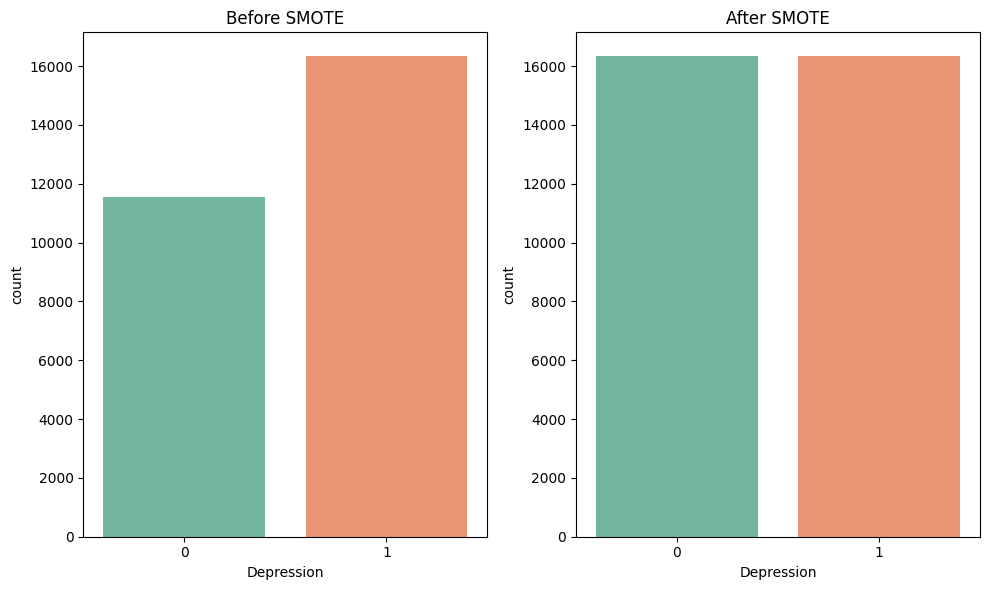

Interpretation: SMOTE balances classes to 50/50, reducing bias for depression prediction.


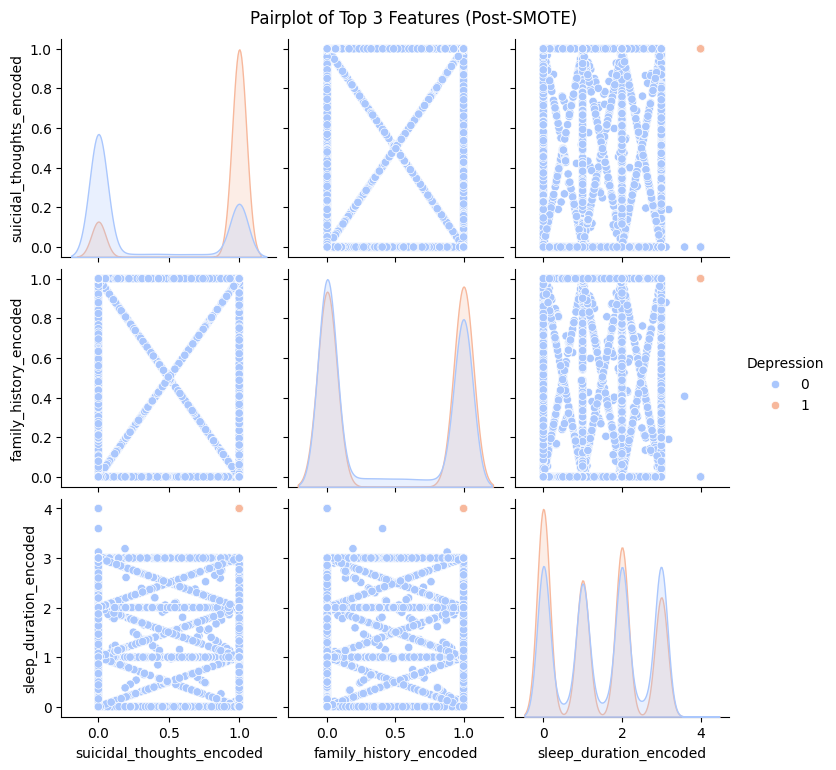

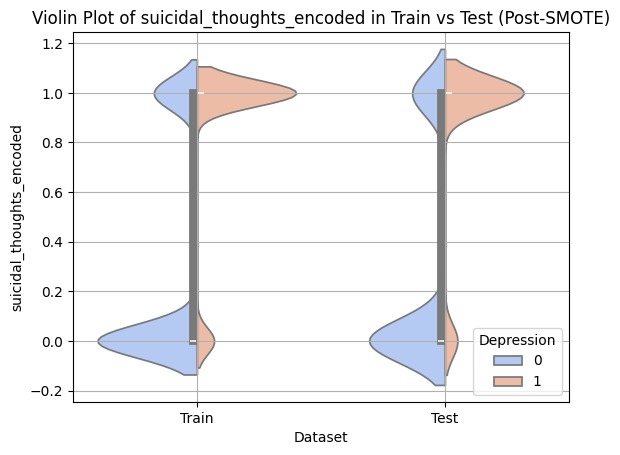

Interpretation: Similar distributions in train/test ensure no split bias; depressed group shows higher variance in top feature.


In [42]:

## 8.Handle Imbalances and Final part


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load from Step 8
try:
    df = pd.read_csv('selected_features_student_depression.csv')
except FileNotFoundError:
    print("Error: File not found. Run feature selection first.")
    exit()

# Fill NaNs if any (safe; your data clean)
df = df.fillna(0)

# Convert Depression to int (fix for float labels)
df['Depression'] = df['Depression'].astype(int)

# Identify features (exclude 'id' and 'Depression')
feature_columns = [col for col in df.columns if col not in ['id', 'Depression']]

# Extract X/y
X = df[feature_columns]
y = df['Depression']

# Class distribution before SMOTE
print("\nClass Distribution Before SMOTE:")
print(y.value_counts(normalize=True))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# To DataFrame
X_balanced_df = pd.DataFrame(X_balanced, columns=feature_columns)
y_balanced_series = pd.Series(y_balanced, name='Depression')

# Class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_balanced_series.value_counts(normalize=True))

# Save balanced full (final preprocessed)
balanced_df = pd.concat([X_balanced_df, y_balanced_series], axis=1)
balanced_df.to_csv('final_preprocessed_balanced.csv', index=False)
print("\nFinal balanced preprocessed dataset saved as 'final_preprocessed_balanced.csv'")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Combine and save
train_df = pd.concat([pd.DataFrame(X_train, columns=feature_columns), y_train], axis=1)
test_df = pd.concat([pd.DataFrame(X_test, columns=feature_columns), y_test], axis=1)
train_df.to_csv('train_student_depression.csv', index=False)
test_df.to_csv('test_student_depression.csv', index=False)
print("Train/test saved.")

# EDA Viz 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x=y, palette='Set2', ax=axes[0])
axes[0].set_title('Before SMOTE')
sns.countplot(x=y_balanced_series, palette='Set2', ax=axes[1])
axes[1].set_title('After SMOTE')
plt.tight_layout()
plt.savefig('results/eda_visualizations/member_6/class_distribution_smote.png')
plt.show()
print("Interpretation: SMOTE balances classes to 50/50, reducing bias for depression prediction.")

# EDA Viz 2: Pairplot (top 3 features)
top_features = feature_columns[:3]
pairplot_df = pd.concat([X_balanced_df[top_features], y_balanced_series], axis=1)
sns.pairplot(pairplot_df, hue='Depression', palette='coolwarm')
plt.suptitle('Pairplot of Top 3 Features (Post-SMOTE)', y=1.02)
plt.savefig('results/eda_visualizations/member_6/top_features_pairplot.png')
plt.show()

# EDA Viz 3: Violin Plot (top feature train vs test)
top_feature = feature_columns[0]
violin_df = pd.concat([train_df.assign(Dataset='Train'), test_df.assign(Dataset='Test')])
sns.violinplot(x='Dataset', y=top_feature, hue='Depression', data=violin_df, split=True, palette='coolwarm')
plt.title(f'Violin Plot of {top_feature} in Train vs Test (Post-SMOTE)')
plt.grid(True)
plt.savefig('results/eda_visualizations/member_6/top_feature_violinplot.png')
plt.show()
print("Interpretation: Similar distributions in train/test ensure no split bias; depressed group shows higher variance in top feature.")